In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Higgs.tools.ImplementationUtils import (
    fromHB5Table2,
    implementPairDecayLimit,
    implementPairProductionLimit,
)
from Higgs import bounds as HB
from Higgs import predictions as HP
from Higgs import Predictions

import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))))
import MassResolutions as resolution


# LEP `ee -> Z Hi, Hi -> Hj Hj -> 4b` [hep-ex/0602042](https://arxiv.org/abs/hep-ex/0602042)

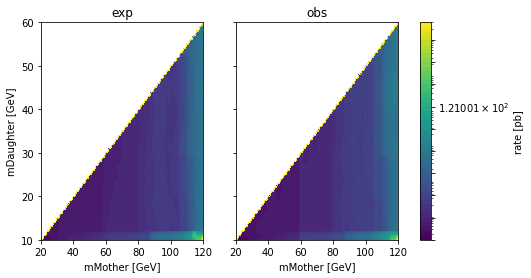

Looks good. Saving this to eeHZ_LEP_LEPComb_3.json


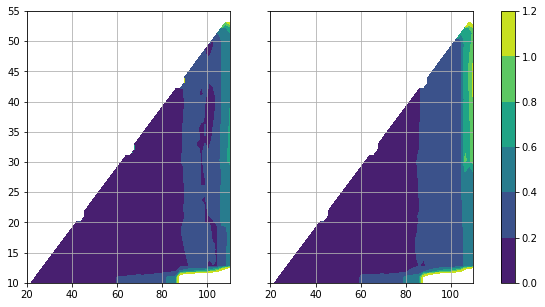

In [2]:
df = fromHB5Table2("table15full", "LEP")
df = df.loc[(df.mMother >= 20) & (df.mDaughter >= 10)].reset_index(drop=True)
df.loc[df.obs < 0, "obs"] = 1e6
df.loc[df.exp < 0, "exp"] = 1e6

limitFile = implementPairDecayLimit(
    711130,
    {"production": ["eeHZ"], "firstDecay": ["bb"], "secondDecay": ["bb"]},
    "Tab 15/Fig 3a",
    df,
    idSuffix=15,
    luminosity=2.6,
    massResolution={"mother": resolution.LEPZH, "daughter": resolution.LEPZH},
)

lim = HB.Limit(limitFile)
pred = Predictions()
hh = pred.addParticle(HP.NeutralScalar("hh"))
hl = pred.addParticle(HP.NeutralScalar("hl"))
hh.setDecayWidth("hl", "hl", 1)
hl.setDecayWidth("bb", 1)
hh.setNormalizedCxn("LEP", "eeHZ", 1)


def testAgainstLimit(mMother, mDaughter):
    hh.setMass(mMother)
    hl.setMass(mDaughter)
    app = lim.apply(pred)
    if len(app) == 0:
        return (1e-6, 1e-6)
    return (app[0].expRatio(), app[0].obsRatio())


msMother = np.linspace(20, 110)
msDaughter = np.linspace(10, 55)
r = np.linspace(1e-2, 1)
test = np.frompyfunc(testAgainstLimit, 2, 2)
expR, obsR = test(*np.meshgrid(msMother, msDaughter))
fig, axes = plt.subplots(figsize=(10, 5), ncols=2, sharex=True, sharey=True)
cf = axes[0].contourf(msMother, msDaughter, 1 / expR, levels=np.arange(0, 1.3, 0.2))
axes[1].contourf(msMother, msDaughter, 1 / obsR, levels=np.arange(0, 1.3, 0.2))
for ax in axes:
    ax.grid()
fig.colorbar(cf, ax=axes)
plt.show()


# LEP `ee -> Hi Hj -> 4b` [hep-ex/0602042](https://arxiv.org/abs/hep-ex/0602042)

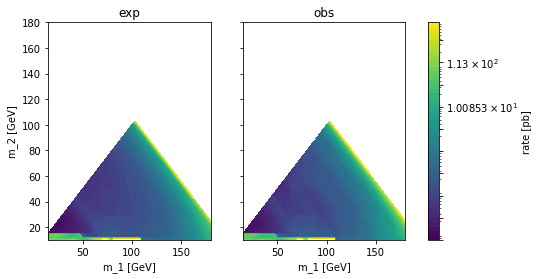

Looks good. Saving this to nonres_LEP_LEPComb_3.json


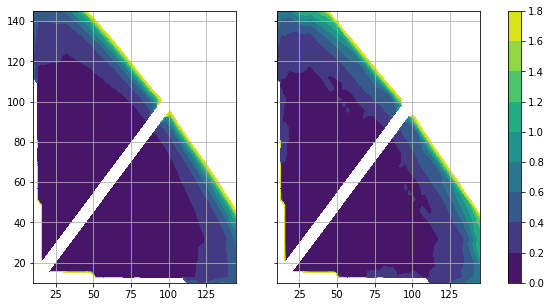

In [3]:
df = fromHB5Table2("table18full", "LEP", p1Name="1", p2Name="2")
df = df.loc[(df.m1 >= 15) & (df.m2 >= 10)].reset_index(drop=True)
df.loc[(df.obs < 0) | (df.obs > 1e3), "obs"] = 1e6
df.loc[(df.exp < 0) | (df.exp > 1e3), "exp"] = 1e6

limitFile = implementPairProductionLimit(
    711130,
    {"firstDecay": ["bb"], "secondDecay": ["bb"]},
    "Tab 18/Fig 5a",
    df,
    idSuffix=18,
    luminosity=2.6,
    massResolution={
        "firstParticle": resolution.LEPZH,  # certainly not better
        "secondParticle": resolution.LEPZH,  # same
    },
)

lim = HB.Limit(limitFile)
pred = Predictions()
hh = pred.addParticle(HP.NeutralScalar("hh"))
hl = pred.addParticle(HP.NeutralScalar("hl"))
hh.setDecayWidth("bb", 1)
hl.setDecayWidth("bb", 1)
pred.setBsmPairCxn("LEP", "hh", "hl", 1)


def testAgainstLimit(mMother, mDaughter):
    hh.setMass(mMother)
    hl.setMass(mDaughter)
    app = lim.apply(pred)
    if len(app) == 0:
        return (1e-6, 1e-6)
    return (app[0].expRatio(), app[0].obsRatio())


ms = np.linspace(10, 145)
test = np.frompyfunc(testAgainstLimit, 2, 2)
expR, obsR = test(*np.meshgrid(ms, ms))
fig, axes = plt.subplots(figsize=(10, 5), ncols=2, sharex=True, sharey=True)
cf = axes[0].contourf(ms, ms, 1 / expR, levels=np.arange(0, 2, 0.2))
axes[1].contourf(ms, ms, 1 / obsR, levels=np.arange(0, 2, 0.2))
for ax in axes:
    ax.grid()
fig.colorbar(cf, ax=axes)
plt.show()
